In [16]:
import pandas as pd
import re
import string
import csv
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk import word_tokenize
from spellchecker import SpellChecker
import matplotlib.pyplot as plt

In [17]:
twitter=pd.read_csv(r"C:\Users\pawan_300\Desktop\Project work\ml files\ml project\tweets.csv")

In [18]:
twitter

,Text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @TheCoachesSite: In the U fourth and final ...,False,0,NaN,4/6/2019 17:11,False,NaN,1.110000e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",coachescounsel,1,True,False
1,RT @NewquayZoo: We've got ASAP some exciting n...,False,0,NaN,4/6/2019 17:11,False,NaN,1.110000e+18,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",brglilly,1,True,False
2,The outcome of the PRIOR CHESTNUTS FUNDRAISER ...,False,0,NaN,4/6/2019 17:11,True,NaN,1.110000e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",tcsbybloomex,0,False,False
3,@anandmahindra @TCS New india and old india <U...,False,0,anandmahindra,4/6/2019 17:10,False,1.110000e+18,1.110000e+18,3.419795e+07,"<a href=""http://twitter.com/download/iphone"" r...",JavedKhjaak,0,False,False
4,TCS Developing Five Blockchain Platforms https...,False,0,NaN,4/6/2019 17:09,False,NaN,1.110000e+18,NaN,"<a href=""http://localhost.com"" rel=""nofollow"">...",devnullius,0,False,False
5,@anandmahindra @AvinashGoraksha @TCS Sir TCS h...,False,0,anandmahindra,4/6/2019 17:09,True,1.110000e+18,1.110000e+18,3.419795e+07,"<a href=""http://twitter.com/download/android"" ...",avadhutak5985,0,False,False
6,"Why Flipkart, Amazon, OYO, Paytm and not TCS, ...",False,0,NaN,4/6/2019 17:08,False,NaN,1.110000e+18,NaN,"<a href=""http://stockmarketindia.tumblr.com/"" ...",stocks_in,0,False,False
7,"Why Flipkart, Amazon, OYO, Paytm and never TCS...",False,0,NaN,4/6/2019 17:08,False,NaN,1.110000e+18,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",TRENDINGHITS1,0,False,False
8,"@anandmahindra @TCS Sir, you are great to give...",False,0,anandmahindra,4/6/2019 17:06,False,1.110000e+18,1.110000e+18,3.419795e+07,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",SandeshShiva,0,False,False
9,Sab tcs kar rhi hi ASAP on official demand,False,0,DIPTAMANDAL6,4/6/2019 17:06,False,1.110000e+18,1.110000e+18,1.060000e+18,"<a href=""http://twitter.com/download/android"" ...",SinhaDeepanshu,0,False,False


In [19]:
def stopword():
    stop=stopwords.words("english")
    twitter["Text"]=twitter["Text"].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))#Stopword removal

In [20]:
def remove():
    twitter["Text"]=twitter["Text"].apply(lambda x:re.sub(r"http\S+",'', x)) #for url
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",'',x)) #for email
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub('@[^\s]+','',x)) #for username
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub('#[^\s]+','',x)) #for trending # words
    twitter['Text']=twitter['Text'].apply(lambda x:re.sub('\$\w*','',x)) 

In [21]:
stopword()
remove()

In [22]:
punct_num = '''!()-àÂ[]{};:\n,<>./?@#%^"&\*_~0123456789=\x92\x92\x96\x85+|'"''' #for punctuation
def punctuation(x):
    no_punct = ""
    for char in x:
            if char not in punct_num :
                no_punct = no_punct + char  
    return(no_punct)
twitter['Text']=twitter['Text'].apply(lambda x:punctuation(x))

In [23]:
fileName = r"C:\Users\pawan_300\Desktop\Project work\ml files\ml project\slang.txt"
accessMode = "r"
def slang_translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        with open(fileName, accessMode) as myCSVfile:
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                if _str.upper() == row[0]:
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    return(' '.join(user_string))
twitter['Text']=twitter['Text'].apply(lambda x:slang_translator(x))

In [ ]:
spell = SpellChecker()
def spellcheck(x):
        correct={}
        wrong=spell.unknown(x.split())
        for t in wrong:
            correct[t]=spell.correction(t)
        for t in correct.keys():
            x= re.sub(t,correct[t],x,flags=re.IGNORECASE)
        return(x)
twitter['Text']=twitter['Text'].apply(lambda x:spellcheck(x)) #this will take some time 

## Polarity

In [24]:
def polarity():
    pole=[]
    t=[]
    for line in twitter["Text"]:
        temp=TextBlob(line).sentiment.polarity
        t.append(temp)
        if(temp>0):
            pole.append('positive')
        elif(temp<0):
            pole.append('negative')
        else:
            pole.append('neutral')
    return(pole,t)
pole,temp=polarity()
twitter['Sentiment']=pole
twitter['Sentiment_score']=temp

(array([2125.,    0.,    0.,    0.,    0., 1928.,    0.,    0.,    0.,
         519.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

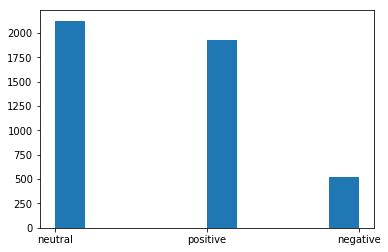

In [25]:
plt.hist(pole,histtype='bar',align='mid')